# KNN 실습 notebook
- 데이터 출처
    - 1. https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv
    - 2. https://www.kaggle.com/uciml/iri
---

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. KNN - regression

## 1. load data

In [8]:
# 데이터 출처 : https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv
data = pd.read_csv("datasets_894_813759_2019.csv")

In [9]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [18]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [17]:
# 예측하는데 필요없는 feature 제거
data.drop(['Overall rank', 'Country or region'], axis=1, inplace=True)
data

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## 2. train test split

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [158]:
# 정규화 수행
standard_scaler = StandardScaler()

In [159]:
# X에만 정규화 수행
X = data.drop('Score', axis=1)
X = standard_scaler.fit_transform(X)

y = data['Score']

In [160]:
# train, test 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [161]:
# train, test 사이즈 확인
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(124, 6) (32, 6)
(124,) (32,)


## 3. train

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
# KNN model load
knn = KNeighborsRegressor()

In [164]:
# KNN 하긋ㅂ
knn.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## 4. test

In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
# KNN 예측
pred_y = knn.predict(test_X)

In [167]:
# score 확인
print("MSE : ", mean_squared_error(test_y, pred_y))

MSE :  0.3086354587499997


In [168]:
# 다양한 distance에 대한 소개는 아래 링크 참고해주세요 :)
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
knn = KNeighborsRegressor(metric="manhattan") # 다른 distance 사용 가능

In [169]:
# 학습
knn.fit(train_X, train_y)
# 예측
pred_y = knn.predict(test_X)
# 성능평가
print("MSE : ", mean_squared_error(test_y, pred_y))

MSE :  0.2366853499999999


# 2. KNN - classification

## 1. load data

In [42]:
# https://www.kaggle.com/uciml/iris
iris = pd.read_csv("datasets_19_420_Iris.csv")

In [43]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
# 결측치 존재하지 않음
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# 반응변수 수치형으로 변경
label_encoder = LabelEncoder()

In [47]:
label_encoder.fit_transform(iris['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
iris['Species'] = label_encoder.fit_transform(iris['Species'])

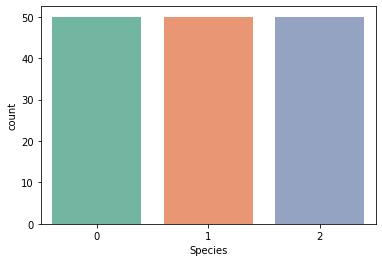

In [54]:
# 각 범주 별 빈도 출력
sns.countplot(iris['Species'], palette='Set2')

## 2. train test split

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
# X, y 분리
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']

In [64]:
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2)
print(train_y.value_counts())
print(test_y.value_counts())

1    41
0    40
2    39
Name: Species, dtype: int64
2    11
0    10
1     9
Name: Species, dtype: int64


In [65]:
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2, stratify=y)
print(train_y.value_counts())
print(test_y.value_counts())

2    40
1    40
0    40
Name: Species, dtype: int64
2    10
1    10
0    10
Name: Species, dtype: int64


## 3. train

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# KNN model load
knn_classifier = KNeighborsClassifier()

In [67]:
# 학습
knn_classifier.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 4. test

In [68]:
# 예측
pred_y = knn_classifier.predict(test_X)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
# 평가
print("ACC : ", accuracy_score(test_y, pred_y))

ACC :  0.9666666666666667


In [73]:
confusion_matrix(test_y, pred_y)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

# 3. grid search + k-fold cross validation

In [121]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = data.drop('Score', axis=1)
y = data['Score']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [122]:
knn_reg = KNeighborsRegressor()

In [139]:
grid_search = GridSearchCV(knn_reg, # model
                           {"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}, # hyperparameter
                           scoring='neg_mean_squared_error',  # score
                           cv=5)

In [140]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [145]:
# grid search cv 결과 시각화
# n_neighbors가 얼마일 때 test_score가 적은 지/큰 지 확인해보고 적절한 값을 선택하시면 됩니다.
pd.DataFrame(grid_search.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
7,8,-0.236546,0.054385,1
5,6,-0.238153,0.043873,2
8,9,-0.239039,0.057128,3
6,7,-0.241900,0.050404,4
9,10,-0.243421,0.056098,5
3,4,-0.252489,0.042148,6
4,5,-0.254869,0.049921,7
10,11,-0.255174,0.065724,8
2,3,-0.255780,0.072714,9
11,12,-0.262608,0.072538,10


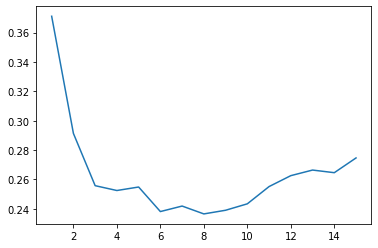

In [146]:
# n_neighbors에 따라 score가 어떻게 변하는 지 시각화
sns.lineplot(x=grid_search.cv_results_['param_n_neighbors'], y=-grid_search.cv_results_['mean_test_score'])

In [151]:
# grid search 통해 구한 최적의 hyperparameter로 다시 학습/예측/평가
knn_reg = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg.fit(train_X, train_y)
pred_y = knn_reg.predict(test_X)
mean_squared_error(test_y, pred_y)

0.37575052294921873